## 1. Data

## 2. Importing
- Import data from a flat file (.csv, .xls, xlsx, .txt, etc.)
- Retrieve data using online SQL, APIs, or web scraping

In [1]:
# import pandas library
import pandas as pd

# read the csv file in library
df = pd.read_csv("datasets/house_prices_1.csv")

# show results
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


### Retrieve data using SQL
<hr>

In [2]:
# import sqlalchemy and create a sqlite engine
from sqlalchemy import create_engine

engine = create_engine('sqlite://', echo=False)

# export the dataframe as a table 'house_prices' to the sqlite engine
df.to_sql("house_prices", con=engine)

In [3]:
# execute SQL by selecting all
result = engine.execute("SELECT * FROM house_prices")

# fetch all rows
rows = result.fetchall()
# print(rows)

## 3. Preperation
- Create pandas DataFrame
- Drop duplicates, replace missing values
- Sorting, indexing, filtering, grouping 
- Discuss the definition of custom functions for reusable code
- Merge DataFrames

### DataFrame
<hr>

In [4]:
# format result from SQL as a dataframe
house_prices_1 = pd.DataFrame(rows)
house_prices_1.columns = result.keys()

# show first 5 results
house_prices_1.head()

,index,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


### Data Cleaning
<hr>

In [5]:
house_prices_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  29451 non-null  int64  
 1   POSTED_BY              29451 non-null  object 
 2   UNDER_CONSTRUCTION     29451 non-null  int64  
 3   RERA                   29451 non-null  int64  
 4   BHK_NO.                29451 non-null  int64  
 5   BHK_OR_RK              29451 non-null  object 
 6   SQUARE_FT              29451 non-null  float64
 7   READY_TO_MOVE          29451 non-null  int64  
 8   RESALE                 29451 non-null  int64  
 9   ADDRESS                29451 non-null  object 
 10  LONGITUDE              29451 non-null  float64
 11  LATITUDE               29451 non-null  float64
 12  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(6), object(3)
memory usage: 2.9+ MB


In [6]:
house_prices_1 = house_prices_1.drop('index', axis=1)

# shape of dataset
house_prices_1.shape

(29451, 12)

In [7]:
# add new column 'CITY'
house_prices_1['CITY'] = house_prices_1['ADDRESS'].str.split(',').str[-1]
house_prices_1.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata


In [8]:
# new shape of dataset
house_prices_1.shape

(29451, 13)

In [9]:
# data types
house_prices_1.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
CITY                      object
dtype: object

In [10]:
# columns of dataset
house_prices_1.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)', 'CITY'],
      dtype='object')

### Handling Outliers
<hr>

In [11]:
# summary statistics
house_prices_1.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


- From above, the maximum values are 20 for BHK_NO, 254,545,500 for SQUARE_FT, and 30000 for TARGET(PRICE_IN_LACS), which doesn't make sense. Further investigation will be required to dectect outliers for most columns.

In [12]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# define a function to remove outliers
    # set threshold manually based on different columns (default is 1.5)
def remove_outliers(data, threshold):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the outlier bounds
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    outliers_removed = data[(data >= lower_bound) & (data <= upper_bound)]
    return outliers_removed

<AxesSubplot:xlabel='BHK_NO.'>

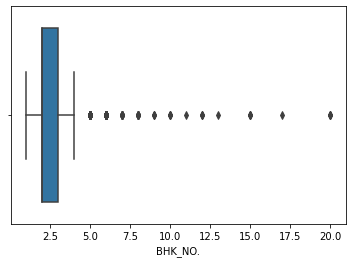

In [13]:
# BKH_NO
sns.boxplot(x=house_prices_1['BHK_NO.'])

<AxesSubplot:xlabel='BHK_NO.'>

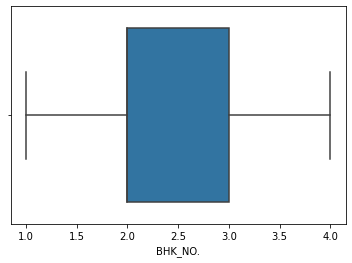

In [14]:
### From above, more than 5 BHK_NO are considered as outliers

# remove outliers
removed_bhk_no_outliers = remove_outliers(house_prices_1['BHK_NO.'], 1.5)

# update the column values
house_prices_1['BHK_NO.'] = removed_bhk_no_outliers.astype(int)

# re-plot
sns.boxplot(x=house_prices_1['BHK_NO.'])

<AxesSubplot:xlabel='SQUARE_FT'>

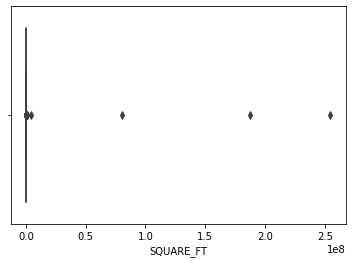

In [15]:
# SQUARE_FT
sns.boxplot(x=house_prices_1['SQUARE_FT'])

<AxesSubplot:xlabel='SQUARE_FT'>

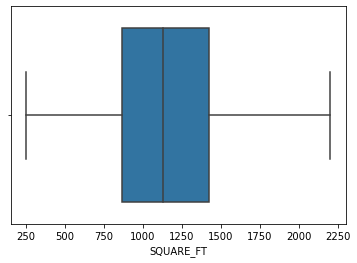

In [16]:
# remove outliers
removed_square_ft_outliers = remove_outliers(house_prices_1['SQUARE_FT'], 1)

# update the column values
house_prices_1['SQUARE_FT'] = removed_square_ft_outliers

# re-plot
sns.boxplot(x=house_prices_1['SQUARE_FT'])

<AxesSubplot:xlabel='LONGITUDE'>

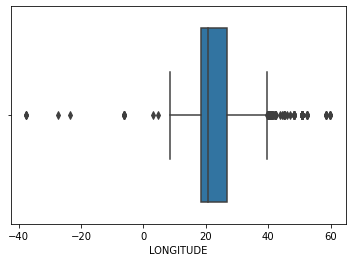

In [17]:
# LONGITUDE
sns.boxplot(x=house_prices_1['LONGITUDE'])

<AxesSubplot:xlabel='LONGITUDE'>

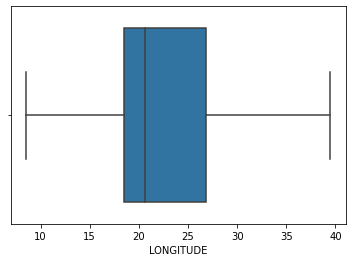

In [18]:
# remove outliers
removed_longitude_outliers = remove_outliers(house_prices_1['LONGITUDE'], 1.5)

# update the column values
house_prices_1['LONGITUDE'] = removed_longitude_outliers

# re-plot
sns.boxplot(x=house_prices_1['LONGITUDE'])

<AxesSubplot:xlabel='LATITUDE'>

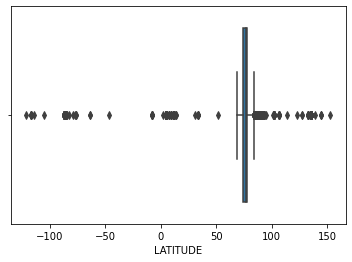

In [19]:
# LONGITUDE
sns.boxplot(x=house_prices_1['LATITUDE'])

<AxesSubplot:xlabel='LATITUDE'>

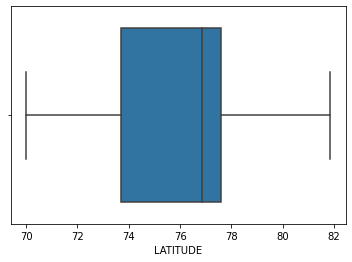

In [20]:
# remove outliers
removed_latitude_outliers = remove_outliers(house_prices_1['LATITUDE'], 1)

# update the column values
house_prices_1['LATITUDE'] = removed_latitude_outliers

# re-plot
sns.boxplot(x=house_prices_1['LATITUDE'])

<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)'>

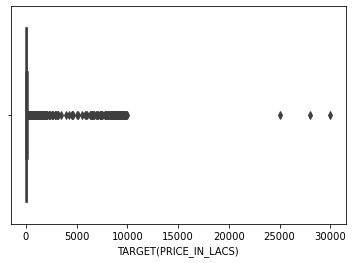

In [21]:
# LONGITUDE
sns.boxplot(x=house_prices_1['TARGET(PRICE_IN_LACS)'])

<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)'>

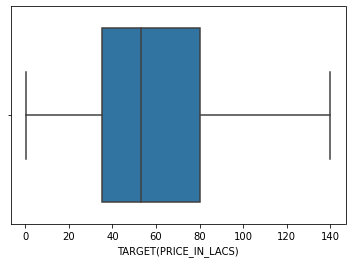

In [22]:
# remove outliers
removed_price_outliers = remove_outliers(house_prices_1['TARGET(PRICE_IN_LACS)'], 0.8)

# update the column values
house_prices_1['TARGET(PRICE_IN_LACS)'] = removed_price_outliers

# re-plot
sns.boxplot(x=house_prices_1['TARGET(PRICE_IN_LACS)'])

In [23]:
# display stats again
new_stats = house_prices_1.describe()
new_stats

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29167.000000,26952.000000,29451.000000,29451.000000,29306.000000,26149.000000,24635.000000
mean,0.179756,0.317918,2.357184,1159.022025,0.820244,0.929578,21.203021,76.108602,59.075501
std,0.383991,0.465675,0.769963,407.240232,0.383991,0.255861,5.908065,2.393321,31.349842
min,0.000000,0.000000,1.000000,250.000000,0.000000,0.000000,8.513294,69.988900,0.250000
25%,0.000000,0.000000,2.000000,867.183934,1.000000,1.000000,18.452663,73.709114,35.000000
50%,0.000000,0.000000,2.000000,1129.943503,1.000000,1.000000,20.621166,76.870000,53.000000
75%,0.000000,1.000000,3.000000,1425.032141,1.000000,1.000000,26.880000,77.597960,80.000000
max,1.000000,1.000000,4.000000,2201.027146,1.000000,1.000000,39.474117,81.857600,140.000000


### Duplicates
<hr>

In [24]:
house_prices_1.shape

(29451, 13)

In [25]:
# find if any duplicates
duplicates = house_prices_1.duplicated().sum()
duplicates

1015

In [26]:
# drop duplicates
house_prices_1 = house_prices_1.drop_duplicates()

duplicates_1 = house_prices_1.duplicated().sum()
duplicates_1

0

### Handling Nulls / Missing Values
<hr>

In [27]:
house_prices_1.shape

(28436, 13)

In [28]:
# calculate sum of nulls
house_prices_1.isnull().sum()

POSTED_BY                   0
UNDER_CONSTRUCTION          0
RERA                        0
BHK_NO.                   252
BHK_OR_RK                   0
SQUARE_FT                1834
READY_TO_MOVE               0
RESALE                      0
ADDRESS                     0
LONGITUDE                 143
LATITUDE                 3239
TARGET(PRICE_IN_LACS)    4201
CITY                        0
dtype: int64

In [29]:
# drop rows with nulls
house_prices_1 = house_prices_1.dropna()
house_prices_1.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
CITY                     0
dtype: int64

In [30]:
house_prices_1.shape

(20556, 13)

### Sorting
<hr>

In [31]:
# sort according to CITY
city_sort = house_prices_1.sort_values('CITY')
city_sort

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
9817,Owner,0,0,3.0,BHK,1399.253731,1,1,"New Agra Colony,Agra",27.213488,78.010686,60.0,Agra
7352,Owner,0,0,4.0,BHK,600.037502,1,1,"Shaheed Nagar,Agra",23.260765,77.386515,32.0,Agra
7377,Dealer,0,1,3.0,BHK,1675.353686,1,1,"Fatehabad Road,Agra",27.100000,78.190000,45.0,Agra
22333,Owner,0,0,2.0,BHK,602.772755,1,1,"Sikandra Bodla Road,Agra",27.083330,77.966670,20.0,Agra
21560,Owner,0,0,2.0,BHK,1350.308642,1,1,"Sikandra,Agra",27.216013,77.950834,35.0,Agra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,Owner,0,0,1.0,BHK,600.000000,1,1,"Sawngi meghe,Wardha",20.750000,78.616670,15.0,Wardha
24538,Owner,0,0,2.0,BHK,806.126562,1,1,"Sindi Meghe,Wardha",20.750000,78.616670,20.0,Wardha
29135,Owner,0,0,2.0,BHK,961.182994,1,1,"mantri park,Washim",19.168967,72.881400,26.0,Washim
10947,Owner,0,0,2.0,BHK,795.053004,1,1,"Chitalkar lay Out, Waghapur,Yavatmal",20.411000,78.113300,18.0,Yavatmal


In [32]:
# sort according to TARGET(PRICE_IN_LACS)
target_price_sort = house_prices_1.sort_values('TARGET(PRICE_IN_LACS)')
target_price_sort

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
27192,Owner,0,0,3.0,BHK,1526.315789,1,1,"New Siddhapudur,Coimbatore",11.023232,76.979607,0.29,Coimbatore
20910,Dealer,1,0,2.0,BHK,1500.000000,0,1,"Vittal Mallya Road,Bangalore",12.971321,77.598190,0.48,Bangalore
8347,Owner,0,1,3.0,BHK,1333.333333,1,1,"Bhayli,Vadodara",22.288976,73.128222,1.00,Vadodara
17527,Dealer,0,0,3.0,BHK,1830.985915,1,1,"Sanjay nagar,Bangalore",13.035200,77.577200,1.30,Bangalore
27895,Owner,0,1,1.0,BHK,612.244898,1,1,"Balapur,Aurangabad",20.486943,75.724278,1.50,Aurangabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,Dealer,0,0,2.0,BHK,1075.351409,1,1,"Kharghar,Lalitpur",24.690280,78.418890,140.00,Lalitpur
12727,Dealer,1,1,2.0,BHK,656.383328,0,0,"Goregaon (East),Maharashtra",19.161500,72.873100,140.00,Maharashtra
824,Dealer,0,0,2.0,BHK,1250.000000,1,1,"Sector-38 Seawoods,Maharashtra",19.019169,73.014086,140.00,Maharashtra
12587,Dealer,0,1,2.0,BHK,1063.183475,1,1,"Kurla (East),Lalitpur",19.064460,72.888131,140.00,Lalitpur


In [33]:
# sort according to LATITUDE
latitude_sort = house_prices_1.sort_values('LATITUDE', ascending=False)
latitude_sort

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
22445,Dealer,1,1,3.0,BHK,1715.492214,0,1,"George Town,Allahabad",25.448100,81.857600,130.0,Allahabad
4819,Owner,0,0,3.0,BHK,1434.720230,1,1,"George Town,Allahabad",25.448100,81.857600,110.0,Allahabad
7141,Owner,0,0,2.0,BHK,800.000000,1,1,"Mumfordganj,Allahabad",25.476749,81.854706,50.0,Allahabad
7627,Owner,0,0,2.0,BHK,1050.199538,1,1,"Mumfordganj,Allahabad",25.476749,81.854706,50.0,Allahabad
7262,Dealer,0,1,2.0,BHK,1031.033598,1,1,"Preetam Nagar,Allahabad",25.450000,81.850000,40.2,Allahabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12101,Owner,0,0,2.0,BHK,1178.054527,1,1,"Panchavati,Jamnagar",23.118635,70.022051,35.0,Jamnagar
7405,Owner,0,0,2.0,BHK,1200.192031,1,1,"Panchavati,Jamnagar",23.118635,70.022051,25.0,Jamnagar
3263,Owner,0,0,2.0,BHK,1070.292161,1,1,"Panchavati,Jamnagar",23.118635,70.022051,37.0,Jamnagar
10609,Owner,0,0,1.0,BHK,774.225774,1,1,"Panchavati,Jamnagar",23.118635,70.022051,15.5,Jamnagar


In [34]:
# sort according to POSTED_BY, CITY and TARGET(PRICE_IN_LACS) 
posted_city_price_sort = house_prices_1.sort_values(['POSTED_BY','CITY','TARGET(PRICE_IN_LACS)'], ascending=[True,False,True])
posted_city_price_sort

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
2000,Builder,1,1,2.0,BHK,1176.668914,0,0,"Penamaluru,Vijayawada",16.461088,80.717926,34.9,Vijayawada
16230,Builder,1,1,3.0,BHK,1295.647824,0,0,"Gollapudi,Vijayawada",16.535675,80.583436,51.8,Vijayawada
1059,Builder,0,0,3.0,BHK,1600.000000,1,0,"Poranki,Vijayawada",16.474310,80.712810,62.4,Vijayawada
26286,Builder,1,1,2.0,BHK,558.534406,0,0,"Waghodia Road,Vadodara",22.294094,73.233686,12.5,Vadodara
21496,Builder,1,1,2.0,BHK,915.216171,0,0,"Tarsali,Vadodara",22.261354,73.215533,16.3,Vadodara
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27424,Owner,0,0,3.0,BHK,1749.920458,1,1,"Sikandra,Agra",27.216013,77.950834,55.0,Agra
9817,Owner,0,0,3.0,BHK,1399.253731,1,1,"New Agra Colony,Agra",27.213488,78.010686,60.0,Agra
23978,Owner,0,0,3.0,BHK,1962.708538,1,1,"Bajrang Nagar,Agra",27.212083,77.955585,60.0,Agra
2010,Owner,0,0,3.0,BHK,1679.731243,1,1,"delhi gate,Agra",21.204824,72.839290,75.0,Agra


### Indexing
#### a) Column Access [ ]
<hr>

In [35]:
# get types of CITY
type(house_prices_1[['CITY']])

pandas.core.frame.DataFrame

In [36]:
# get all cities as DataFrame
house_prices_1[['CITY']]

,CITY
0,Bangalore
1,Mysore
2,Bangalore
3,Ghaziabad
5,Kochi
...,...
29444,Mumbai
29445,Belgaum
29448,Jaipur
29449,Chennai


In [37]:
# get ADDRESS, LONGITUDE, and LATITUDE 
house_prices_1[['ADDRESS','LONGITUDE','LATITUDE']]

,ADDRESS,LONGITUDE,LATITUDE
0,"Ksfc Layout,Bangalore",12.969910,77.597960
1,"Vishweshwara Nagar,Mysore",12.274538,76.644605
2,"Jigani,Bangalore",12.778033,77.632191
3,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500
5,"South Chittoor,Kochi",10.033280,76.282571
...,...,...,...
29444,"Mulund (West),Mumbai",19.175900,72.952200
29445,"Tilakwadi,Belgaum",15.866670,74.500000
29448,"Ajmer Road,Jaipur",26.928785,75.828002
29449,"Sholinganallur,Chennai",12.900150,80.227910


#### b) Row Access [ ]
<hr>

In [38]:
# get first 5 rows
house_prices_1[0:5]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2.0,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2.0,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2.0,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2.0,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad
5,Owner,0,0,3.0,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,42.0,Kochi


In [39]:
# get 6th to 10th rows
house_prices_1[5:10]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
6,Dealer,0,0,3.0,BHK,1495.053957,1,1,"Sodala,Jaipur",26.916347,75.795600,66.5,Jaipur
7,Owner,0,1,3.0,BHK,1181.012946,1,1,"Kharar,Mohali",30.740000,76.650000,52.0,Mohali
8,Dealer,0,1,2.0,BHK,1040.000000,1,1,"Bileshivale,Bangalore",13.054202,77.674002,41.6,Bangalore
9,Owner,0,1,2.0,BHK,879.120879,1,1,"Chromepet,Chennai",12.951610,80.140970,36.0,Chennai
11,Dealer,0,0,2.0,BHK,1333.010179,1,1,"Hebbal,Bangalore",13.040340,77.591347,110.0,Bangalore


#### c) Row & Column Access (LOC)
<hr>

In [40]:
#get rows of ID 7,8,9
house_prices_1.loc[[7,8,9]]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
7,Owner,0,1,3.0,BHK,1181.012946,1,1,"Kharar,Mohali",30.740000,76.650000,52.0,Mohali
8,Dealer,0,1,2.0,BHK,1040.000000,1,1,"Bileshivale,Bangalore",13.054202,77.674002,41.6,Bangalore
9,Owner,0,1,2.0,BHK,879.120879,1,1,"Chromepet,Chennai",12.951610,80.140970,36.0,Chennai


In [41]:
# get rows and ADDRESS, LONGITUDE, and LATITUDE columns for ID 7,8,9
house_prices_1.loc[[7,8,9], ['ADDRESS','LONGITUDE','LATITUDE']]

,ADDRESS,LONGITUDE,LATITUDE
7,"Kharar,Mohali",30.740000,76.650000
8,"Bileshivale,Bangalore",13.054202,77.674002
9,"Chromepet,Chennai",12.951610,80.140970


In [42]:
# get rows for Bangalore city 
house_prices_1.loc[house_prices_1['CITY'] == 'Bangalore']

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2.0,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore
2,Owner,0,0,2.0,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore
8,Dealer,0,1,2.0,BHK,1040.000000,1,1,"Bileshivale,Bangalore",13.054202,77.674002,41.6,Bangalore
11,Dealer,0,0,2.0,BHK,1333.010179,1,1,"Hebbal,Bangalore",13.040340,77.591347,110.0,Bangalore
12,Owner,0,0,2.0,BHK,927.177902,1,1,"Garebhavipalya,Bangalore",12.969910,77.597960,48.0,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29404,Dealer,0,1,2.0,BHK,942.269409,1,1,"Sarjapur,Bangalore",12.860000,77.786000,28.4,Bangalore
29408,Dealer,0,0,2.0,BHK,1105.845182,1,1,"Horamavu Agara,Bangalore",13.031800,77.658300,42.0,Bangalore
29421,Dealer,0,0,2.0,BHK,1409.064497,1,1,"Ambedkar Nagar,Bangalore",13.019578,77.017574,97.0,Bangalore
29433,Owner,0,0,2.0,BHK,1195.028681,1,1,"Hulimavu,Bangalore",12.876691,77.599080,50.0,Bangalore


#### d) Row & Column Access (ILOC)
<hr>

In [43]:
# get first 3 rows
house_prices_1.iloc[[0,1,2]]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2.0,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2.0,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2.0,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore


In [44]:
# get first 10 rows
house_prices_1.iloc[0:5, :]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2.0,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2.0,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2.0,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2.0,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad
5,Owner,0,0,3.0,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,42.0,Kochi


In [45]:
# get rows with ADDRESS, LONGITUDE, and LATITUDE col for ID 1,2,3
house_prices_1.iloc[[0,1,2],[8,9,10]]

,ADDRESS,LONGITUDE,LATITUDE
0,"Ksfc Layout,Bangalore",12.969910,77.597960
1,"Vishweshwara Nagar,Mysore",12.274538,76.644605
2,"Jigani,Bangalore",12.778033,77.632191


In [46]:
# get all ADDRESS and TARGET(PRICE_IN_LACS)
house_prices_1.iloc[:,[8,11]]

,ADDRESS,TARGET(PRICE_IN_LACS)
0,"Ksfc Layout,Bangalore",55.0
1,"Vishweshwara Nagar,Mysore",51.0
2,"Jigani,Bangalore",43.0
3,"Sector-1 Vaishali,Ghaziabad",62.5
5,"South Chittoor,Kochi",42.0
...,...,...
29444,"Mulund (West),Mumbai",100.0
29445,"Tilakwadi,Belgaum",40.0
29448,"Ajmer Road,Jaipur",27.1
29449,"Sholinganallur,Chennai",67.0


### Filtering
#### a) Comparsion Operator
<hr>

In [47]:
# selecting rows where 'TARGET(PRICE_IN_LACS)' is greater than 70
result_df = house_prices_1[house_prices_1['TARGET(PRICE_IN_LACS)'] > 70] 
result_df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
11,Dealer,0,0,2.0,BHK,1333.010179,1,1,"Hebbal,Bangalore",13.040340,77.591347,110.0,Bangalore
15,Dealer,1,1,3.0,BHK,1394.117647,0,1,"Sector-150 Noida,Noida",28.429614,77.481711,71.1,Noida
19,Dealer,0,1,3.0,BHK,2178.649237,1,1,"Kogilu,Bangalore",13.092356,77.613468,120.0,Bangalore
33,Dealer,1,1,1.0,BHK,864.067439,0,1,"Thane West,Lalitpur",19.180000,72.963330,82.0,Lalitpur
39,Owner,0,0,3.0,BHK,1300.052002,1,1,"Vasanthapura,Bangalore",12.894088,77.548914,75.0,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29421,Dealer,0,0,2.0,BHK,1409.064497,1,1,"Ambedkar Nagar,Bangalore",13.019578,77.017574,97.0,Bangalore
29432,Owner,0,0,4.0,BHK,1212.121212,1,1,"west mambalam,Chennai",13.038900,80.225800,110.0,Chennai
29435,Dealer,0,1,4.0,BHK,2189.160468,1,1,"Zirakpur,Chandigarh",30.662283,76.822397,82.4,Chandigarh
29439,Dealer,1,1,2.0,BHK,975.609756,0,1,"Laxmi Nagar,Lalitpur",22.281215,70.789479,120.0,Lalitpur


#### b) By List of Strings
<hr/>

In [48]:
# select rows where CITY is in 'Bangalore' and 'Lalitpur'
options = ['Bangalore', 'Lalitpur'] 
result_df = house_prices_1[house_prices_1['CITY'].isin(options)] 
result_df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2.0,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore
2,Owner,0,0,2.0,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore
8,Dealer,0,1,2.0,BHK,1040.000000,1,1,"Bileshivale,Bangalore",13.054202,77.674002,41.6,Bangalore
11,Dealer,0,0,2.0,BHK,1333.010179,1,1,"Hebbal,Bangalore",13.040340,77.591347,110.0,Bangalore
12,Owner,0,0,2.0,BHK,927.177902,1,1,"Garebhavipalya,Bangalore",12.969910,77.597960,48.0,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29421,Dealer,0,0,2.0,BHK,1409.064497,1,1,"Ambedkar Nagar,Bangalore",13.019578,77.017574,97.0,Bangalore
29429,Builder,0,1,2.0,BHK,974.930362,1,0,"Godhani,Lalitpur",24.166621,78.140498,21.0,Lalitpur
29433,Owner,0,0,2.0,BHK,1195.028681,1,1,"Hulimavu,Bangalore",12.876691,77.599080,50.0,Bangalore
29436,Owner,1,1,2.0,BHK,1175.132676,0,1,"Whitefield,Bangalore",12.995893,77.761394,62.0,Bangalore


#### c) Multiple Conditions
<hr/>

In [49]:
# select rows where CITY is in 'Bangalore' and 'Lalitpur' and POSTED_BY 'Owner'
result_df = house_prices_1[(house_prices_1['POSTED_BY'] == 'Owner') & 
          house_prices_1['CITY'].isin(options)] 
result_df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2.0,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore
2,Owner,0,0,2.0,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore
12,Owner,0,0,2.0,BHK,927.177902,1,1,"Garebhavipalya,Bangalore",12.969910,77.597960,48.0,Bangalore
39,Owner,0,0,3.0,BHK,1300.052002,1,1,"Vasanthapura,Bangalore",12.894088,77.548914,75.0,Bangalore
67,Owner,0,0,3.0,BHK,1538.141758,1,1,"Yelahanka,Bangalore",13.113890,77.598330,74.0,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29341,Owner,0,0,2.0,BHK,915.141431,1,1,"Sarjapura - Attibele Road,Bangalore",12.860000,77.786000,33.0,Bangalore
29359,Owner,0,0,2.0,BHK,1423.324151,1,1,"Mico Layout,Bangalore",12.911464,77.604916,62.0,Bangalore
29378,Owner,0,0,2.0,BHK,1330.082022,1,1,"Bellandur,Bangalore",12.925500,77.676500,120.0,Bangalore
29433,Owner,0,0,2.0,BHK,1195.028681,1,1,"Hulimavu,Bangalore",12.876691,77.599080,50.0,Bangalore


### Grouping
<hr>

In [50]:
# calculate the number of cities
cities_cnt=house_prices_1.groupby('CITY').size().sort_values(ascending=False)
cities_cnt

CITY
Bangalore      3392
Lalitpur       1721
Pune           1708
Noida          1441
Chennai        1113
               ... 
Idukki            1
Nagaur            1
Siddipet          1
Sikar             1
Kurukshetra       1
Length: 209, dtype: int64

In [51]:
# calculate the number of houses posted by which
posted_by_cnt=house_prices_1.groupby('POSTED_BY').size().sort_values(ascending=False)
posted_by_cnt

POSTED_BY
Dealer     11580
Owner       8484
Builder      492
dtype: int64

In [52]:
# calculate the number of BHK
bhk_cnt=house_prices_1.groupby('BHK_NO.').size().sort_values(ascending=False)
bhk_cnt

BHK_NO.
2.0    10470
3.0     6523
1.0     3284
4.0      279
dtype: int64

In [53]:
# calculate the number of resale houses
resale_cnt=house_prices_1.groupby('RESALE').size().sort_values(ascending=False)
resale_cnt

RESALE
1    19168
0     1388
dtype: int64

In [54]:
# calculate mean, median and std 
stats = house_prices_1.groupby('CITY')[['SQUARE_FT','TARGET(PRICE_IN_LACS)']].agg(['mean','median','std'])
stats

SQUARE_FT                          TARGET(PRICE_IN_LACS)         \
                   mean       median         std                  mean median   
CITY                                                                            
Agra        1209.911398  1241.736983  363.390645             37.011429   34.0   
Ahmednagar   792.865899   746.004566  249.431886             27.220833   22.0   
Ajmer       1205.043567  1219.181794  431.426657             36.238095   35.0   
Akola        921.839602   750.098697  358.169581             32.944444   27.0   
Aligarh     1379.043921  1321.815990  256.042858             41.705882   38.5   
...                 ...          ...         ...                   ...    ...   
Visnagar    1080.019637  1080.019637         NaN             22.000000   22.0   
Warangal    1361.293617  1397.567460  116.960409             49.000000   55.0   
Wardha      1065.001905  1050.000000  320.022303             24.400000   21.5   
Washim       961.182994   961.182994         NaN             26.000000   26.0   
Yavatmal     822.552003   822.552003   38.889458             21.500000   21.5   

                       
                  std  
CITY                   
Agra        15.911946  
Ahmednagar  11.860383  
Ajmer       16.388303  
Akola       14.027750  
Aligarh     19.809293  
...               ...  
Visnagar          NaN  
Warangal    12.675436  
Wardha       9.073159  
Washim            NaN  
Yavatmal     4.949747  

[209 rows x 6 columns]

In [55]:
# calculate the average of price and the size of each city 
avg_price_per_city = house_prices_1.groupby("CITY").agg(['mean', 'size'])["TARGET(PRICE_IN_LACS)"]

# sort
avg_price_per_city = avg_price_per_city.sort_values(by=["mean"], ascending = False)
avg_price_per_city

,mean,size
CITY,,
Hathras,140.000000,1
Gurgaon,92.386979,192
Hassan,90.000000,1
Srinagar,90.000000,1
Maharashtra,82.581746,882
...,...,...
Gurdaspur,13.050000,2
Puri,13.000000,1
Barabanki,11.750000,2


In [56]:
# calculate the average price and the size for constructed/non constructed houses
avg_price_per_cons = house_prices_1.groupby("UNDER_CONSTRUCTION").agg(['mean', 'size'])["TARGET(PRICE_IN_LACS)"]
avg_price_per_cons

,mean,size
UNDER_CONSTRUCTION,,
0,58.358624,17053
1,63.417462,3503


In [57]:
# get the max and min price grouping by citie using pivot table
house_prices_1.pivot_table(index = ['CITY'], values = ['TARGET(PRICE_IN_LACS)'], aggfunc = ['max','min'])

,max,min
,TARGET(PRICE_IN_LACS),TARGET(PRICE_IN_LACS)
CITY,,
Agra,85.0,13.6
Ahmednagar,60.0,14.0
Ajmer,65.0,7.8
Akola,55.0,16.5
Aligarh,100.0,20.0
...,...,...
Visnagar,22.0,22.0
Warangal,56.0,30.0


### Define custom functions
<hr>

In [58]:
# get the min value of a column in table
def get_min_val(table, col):
    min_val = None
    for index, row in table.iterrows():
        value = row[col]

        if min_val is None or value < min_val:
            min_val = value
        
    return min_val

# get the max value of a column in table
def get_max_val(table, col):
    max_val = None
    for index, row in table.iterrows():
        value = row[col]
        
        if max_val is None or value > max_val :
            max_val = value
            
    return max_val

In [59]:
# get row of max price
max_price = get_max_val(house_prices_1, 'TARGET(PRICE_IN_LACS)')

house_prices_1.loc[house_prices_1['TARGET(PRICE_IN_LACS)'] == max_price]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
101,Dealer,0,0,2.0,BHK,1155.020213,1,1,"Bhandup (West),Maharashtra",19.147866,72.932609,140.0,Maharashtra
201,Dealer,0,1,2.0,BHK,1087.885617,1,1,"Manpada,Mumbai",19.239813,72.962722,140.0,Mumbai
216,Dealer,0,1,2.0,BHK,820.008200,1,1,"Thane West,Mumbai",19.180000,72.963330,140.0,Mumbai
527,Dealer,0,0,3.0,BHK,1930.235765,1,1,"8th Phase JP Nagar,Bangalore",12.905368,77.580403,140.0,Bangalore
532,Dealer,0,0,3.0,BHK,2026.929202,1,1,"Mathura Road,Faridabad",28.416670,77.300000,140.0,Faridabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28952,Dealer,1,1,2.0,BHK,930.479862,0,1,"Kanjur Marg (East),Maharashtra",18.960000,72.820000,140.0,Maharashtra
29024,Dealer,1,0,4.0,BHK,1850.138760,0,1,"Pandu Nagar,Kanpur",26.472500,80.331110,140.0,Kanpur
29150,Dealer,0,0,2.0,BHK,539.208134,1,1,"Nane Pada,Lalitpur",24.690200,78.416000,140.0,Lalitpur
29183,Dealer,1,1,2.0,BHK,535.004586,0,1,"Kanjur Marg (East),Mumbai",19.221571,73.042474,140.0,Mumbai


In [60]:
# get row of min price
min_price = get_min_val(house_prices_1, 'TARGET(PRICE_IN_LACS)')

house_prices_1.loc[house_prices_1['TARGET(PRICE_IN_LACS)'] == min_price]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
27192,Owner,0,0,3.0,BHK,1526.315789,1,1,"New Siddhapudur,Coimbatore",11.023232,76.979607,0.29,Coimbatore


In [61]:
# get row of max square ft
max_square_ft = get_max_val(house_prices_1, 'SQUARE_FT')

house_prices_1.loc[house_prices_1['SQUARE_FT'] == max_square_ft]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
24490,Owner,0,0,3.0,BHK,2201.027146,1,1,"Rani Chennamma Nagar,Belgaum",15.826768,74.489751,90.0,Belgaum


In [62]:
# get row of min square ft
min_square_ft = get_min_val(house_prices_1, 'SQUARE_FT')

house_prices_1.loc[house_prices_1['SQUARE_FT'] == min_square_ft]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
14695,Owner,0,0,1.0,BHK,250.0,1,1,"Manjalpur,Vadodara",22.271214,73.188827,15.0,Vadodara
24153,Owner,0,0,1.0,BHK,250.0,1,1,"Delhi Ghaziabad Road,Ghaziabad",28.666670,77.416670,6.0,Ghaziabad


### Merge DataFrames
#### The merge of house_prices_2.csv is for demonstration purposes only and will not be used as the final dataset.
<hr>

In [63]:
# read the csv file in library
df2 = pd.read_csv("datasets/house_prices_2.csv")

# show first 5 results
df2.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,22.9
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278,39.0
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911,12.5
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600,52.0
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000,33.0


In [64]:
# get shape of dataset
df2.shape

(68720, 12)

In [65]:
# add new column 'CITY'
df2['CITY'] = df2['ADDRESS'].str.split(',').str[-1]
df2.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,22.9,Surat
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278,39.0,Lalitpur
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911,12.5,Kolkata
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600,52.0,Jaipur
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000,33.0,Nadiad


In [66]:
# get new shape of dataset
df2.shape

(68720, 13)

In [67]:
# calculate sum of nulls
df2.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
CITY                     0
dtype: int64

#### Merging two DataFrames
<hr>

In [68]:
# joining two DataFrames 
house_prices = pd.concat([house_prices_1,df2], axis=0)

In [69]:
# get shape of dataset [house_prices_1]
house_prices_1.shape

(20556, 13)

In [70]:
# get shape of dataset [df2]
df2.shape

(68720, 13)

In [71]:
# get shape of new dataset [house_prices]
house_prices.shape

(89276, 13)

In [72]:
# calculate sum of nulls for each column
house_prices.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
CITY                     0
dtype: int64

In [73]:
# find duplicates
duplicates = house_prices.duplicated().sum()
duplicates

40

In [74]:
# drop duplicates
house_prices = house_prices.drop_duplicates()
house_prices

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2.0,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2.0,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2.0,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2.0,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad
5,Owner,0,0,3.0,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,42.0,Kochi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2.0,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330,25.0,Maharashtra
68716,Dealer,0,1,3.0,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082,140.0,Mohali
68717,Dealer,1,1,1.0,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231,160.0,Maharashtra
68718,Dealer,0,0,2.0,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670,170.0,Pune


In [75]:
# make sure no duplicates
duplicates = house_prices.duplicated().sum()
duplicates

0

## 4. Data Visualisation
- Generate at least FOUR charts using Matplotlib library
- Generate at least FOUR charts using Seaborn library
- Conduct univariate and bivariate analysis using appropriate charts and techniques

### a) Univariate Analysis
<hr>

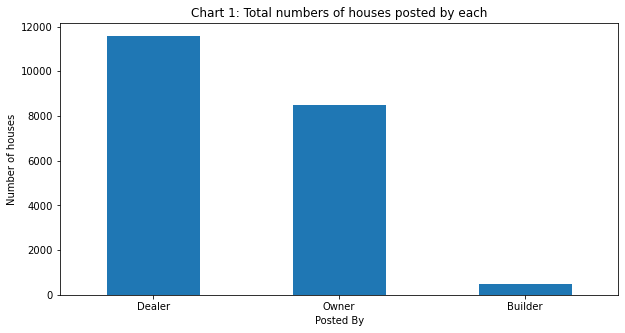

In [76]:
# display the total number of houses posted by each
house_prices_1['POSTED_BY'].value_counts().plot.bar(figsize=(10,5))

plt.xlabel('Posted By')
plt.xticks(rotation=0)
plt.ylabel('Number of houses')
plt.title('Chart 1: Total numbers of houses posted by each')

plt.show()

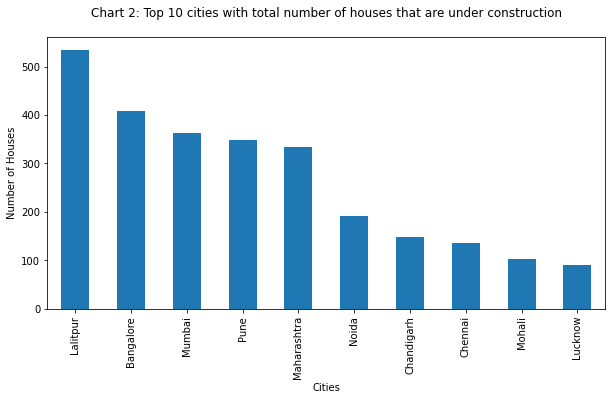

In [77]:
# Top 10 cities with total number of houses that are under construction
plt.figure(figsize=(10 ,5))
house_prices_1.groupby('CITY')['UNDER_CONSTRUCTION'].sum().nlargest(10).plot(kind='bar')

plt.xlabel('Cities')
plt.ylabel('Number of Houses')
plt.title('Chart 2: Top 10 cities with total number of houses that are under construction', pad=20)

plt.show()

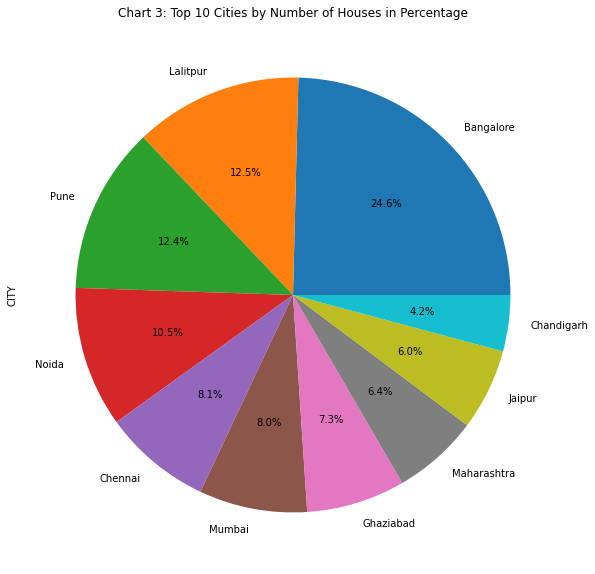

In [78]:
# Top 10 Cities by Number of Houses in %
house_prices_1['CITY'].value_counts().head(10).plot.pie(figsize=(10,10),autopct='%1.1f%%')
plt.title('Chart 3: Top 10 Cities by Number of Houses in Percentage')

plt.show()

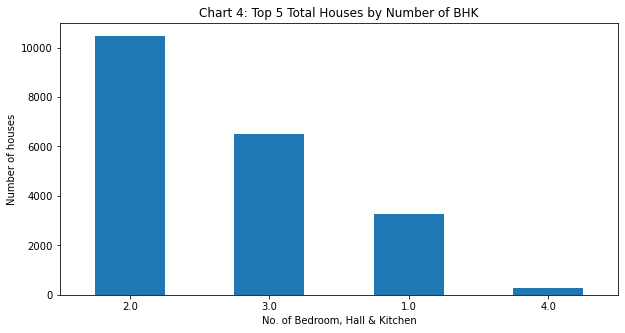

In [79]:
# top 5 Total Number of Houses by Number of BHK
house_prices_1['BHK_NO.'].value_counts().head(5).plot.bar(figsize=(10,5))

plt.xlabel('No. of Bedroom, Hall & Kitchen')
plt.xticks(rotation=0)
plt.ylabel('Number of houses')
plt.title('Chart 4: Top 5 Total Houses by Number of BHK')

plt.show()

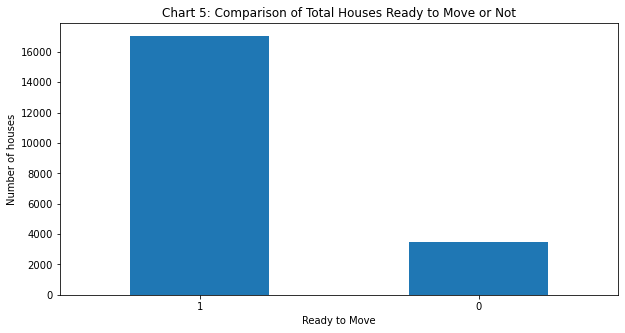

In [80]:
# Comparison of total houses that are ready to move a not
house_prices_1['READY_TO_MOVE'].value_counts().plot.bar(figsize=(10,5))

plt.xlabel('Ready to Move')
plt.xticks(rotation=0)
plt.ylabel('Number of houses')
plt.title('Chart 5: Comparison of Total Houses Ready to Move or Not')

plt.show()

### b) Bivariate Analysis
<hr>

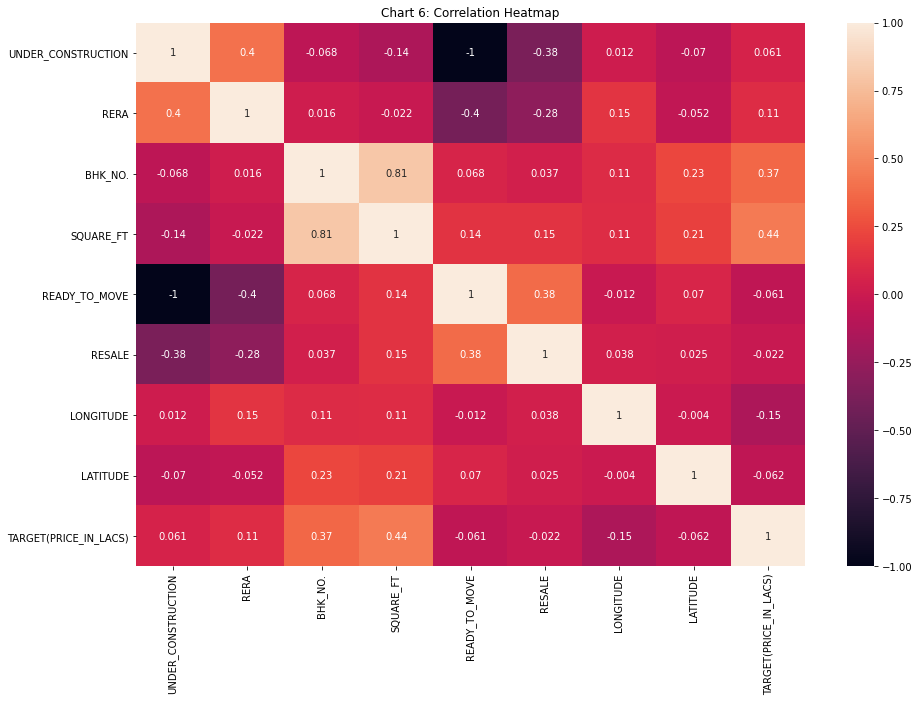

In [81]:
# heatmap shows a visual representation of how variables in data are correlated with each other

plt.figure(figsize=(15,10))
plt.title('Chart 6: Correlation Heatmap')
sns.heatmap(house_prices_1.corr(), annot=True)
plt.show()

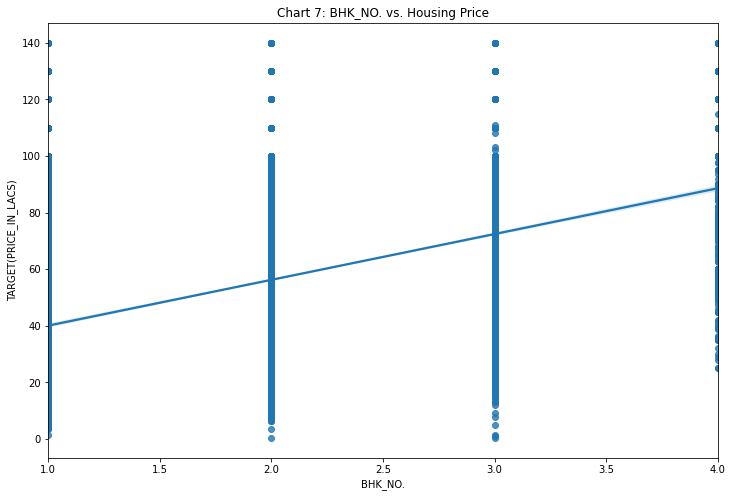

In [82]:
# relationship between BHK_NO. and TARGET(PRICE_IN_LACS)
plt.figure(figsize=(12, 8))
sns.regplot(x='BHK_NO.',y='TARGET(PRICE_IN_LACS)', data=house_prices_1)
plt.title('Chart 7: BHK_NO. vs. Housing Price')
plt.show()

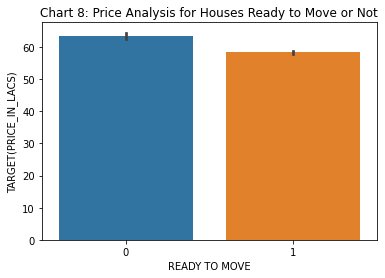

In [83]:
# relationship between READY_TO_MOVE and TARGET(PRICE_IN_LACS)
sns.barplot(x='READY_TO_MOVE',y='TARGET(PRICE_IN_LACS)',data=house_prices_1)

plt.xlabel('READY TO MOVE')
plt.ylabel('TARGET(PRICE_IN_LACS)')
plt.title('Chart 8: Price Analysis for Houses Ready to Move or Not')

plt.show()

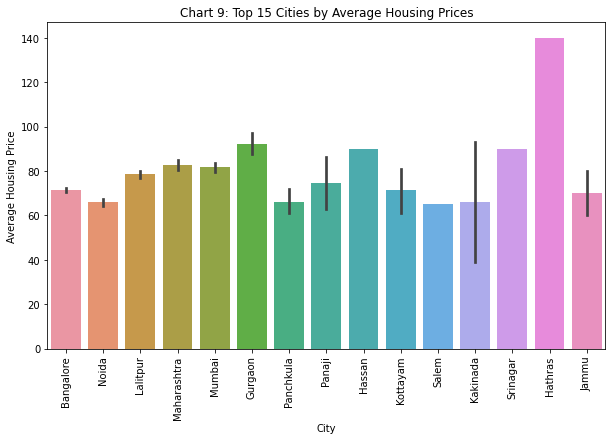

In [84]:
# Top 15 Cities by Average Housing Prices
plt.figure(figsize=(10,6))
top_cities = house_prices_1.groupby('CITY')['TARGET(PRICE_IN_LACS)'].mean().nlargest(15).index
filtered_data = house_prices_1[house_prices_1['CITY'].isin(top_cities)]

sns.barplot(x='CITY', y='TARGET(PRICE_IN_LACS)', data=filtered_data)
plt.xticks(rotation=90) 
plt.title('Chart 9: Top 15 Cities by Average Housing Prices')
plt.xlabel('City')
plt.ylabel('Average Housing Price')
plt.show()

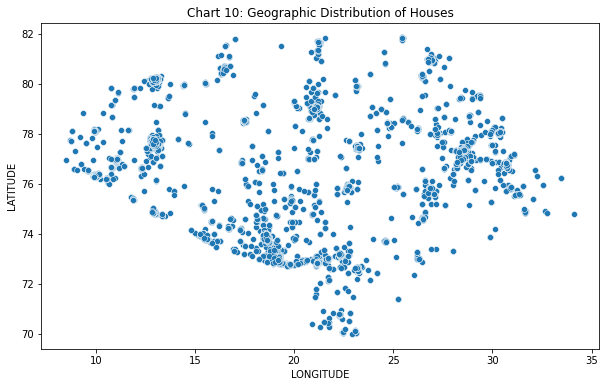

In [85]:
# relationship between longitude and latitude
plt.figure(figsize=(10,6))
sns.scatterplot(x='LONGITUDE',y='LATITUDE',data=house_prices_1)
plt.title('Chart 10: Geographic Distribution of Houses')
plt.show()

## 5. Machine Learning
- Predict a target variable with Supervised or Unsupervised algorithm
- Perform Model Evaluation using metrics suitable for the choice of ML model(s)
-  Perform hyper parameter tuning or boosting, whichever is relevant to your model

In [86]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

!pip install xgboost
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

### a) Supervised or Unsupervised algorithm
<hr>

- Supervised algorithm will be chosen to predict the house prices based on the attributes provided

### b) Perform Model Evaluation
<hr>

In [87]:
house_prices_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20556 entries, 0 to 29450
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              20556 non-null  object 
 1   UNDER_CONSTRUCTION     20556 non-null  int64  
 2   RERA                   20556 non-null  int64  
 3   BHK_NO.                20556 non-null  float64
 4   BHK_OR_RK              20556 non-null  object 
 5   SQUARE_FT              20556 non-null  float64
 6   READY_TO_MOVE          20556 non-null  int64  
 7   RESALE                 20556 non-null  int64  
 8   ADDRESS                20556 non-null  object 
 9   LONGITUDE              20556 non-null  float64
 10  LATITUDE               20556 non-null  float64
 11  TARGET(PRICE_IN_LACS)  20556 non-null  float64
 12  CITY                   20556 non-null  object 
dtypes: float64(5), int64(4), object(4)
memory usage: 2.7+ MB


In [88]:
## Data Preprocessing

# Select only numeric columns
numeric_features = house_prices_1.select_dtypes(include=['float64', 'int64'])

scaled_house_prices = numeric_features.copy()
scaled_house_prices.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,2.0,1300.236407,1,1,12.969910,77.597960,55.0
1,0,0,2.0,1275.000000,1,1,12.274538,76.644605,51.0
2,0,0,2.0,933.159722,1,1,12.778033,77.632191,43.0
3,0,1,2.0,929.921143,1,1,28.642300,77.344500,62.5
5,0,0,3.0,1250.000000,1,1,10.033280,76.282571,42.0


In [89]:
# Seperating features and target variable (X, y)
X = scaled_house_prices.drop("TARGET(PRICE_IN_LACS)", axis=1)
y = scaled_house_prices["TARGET(PRICE_IN_LACS)"]

In [90]:
## Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16444, 8), (16444,), (4112, 8), (4112,))

In [91]:
## Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
## Model Building

# model fitting, predict and display the evaluation using function
def model_evaluation(model, X_train_val, X_test_val, y_train_val , y_test_val):
    model.fit(X_train_val,y_train_val)
    y_pred = model.predict(X_test_val)
    
    # Evaluate the model
    r2 = r2_score(y_test_val, y_pred)
    mae = mean_absolute_error(y_test_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_val, y_pred))
        
    return f"R2/Accuracy Score : {r2:.4f}\nMean Absolute Error (MAE): {mae:.4f}\nRoot Mean Squared Error (RMSE): {rmse:.4f}"


In [93]:
# Linear Regression
lr = LinearRegression()
result = model_evaluation(lr, X_train, X_test, y_train, y_test)
print(result)

R2/Accuracy Score : 0.2754
Mean Absolute Error (MAE): 20.6482
Root Mean Squared Error (RMSE): 26.3067


In [94]:
# Decision Tree Regression
dtr = DecisionTreeRegressor(random_state=42)
result = model_evaluation(dtr, X_train, X_test, y_train, y_test)
print(result)

R2/Accuracy Score : 0.4903
Mean Absolute Error (MAE): 14.0389
Root Mean Squared Error (RMSE): 22.0630


In [95]:
# Random Forest Regression
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
result = model_evaluation(rfr, X_train, X_test, y_train, y_test)
print(result)

R2/Accuracy Score : 0.6828
Mean Absolute Error (MAE): 11.6122
Root Mean Squared Error (RMSE): 17.4063


In [96]:
# Support Vector Regression (SVR)
svr = SVR(kernel='linear')
result = model_evaluation(svr, X_train, X_test, y_train, y_test)
print(result)

R2/Accuracy Score : 0.2336
Mean Absolute Error (MAE): 20.0920
Root Mean Squared Error (RMSE): 27.0549


In [97]:
# Gradient Boosting Regression
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
result = model_evaluation(gbr, X_train, X_test, y_train, y_test)
print(result)

R2/Accuracy Score : 0.6053
Mean Absolute Error (MAE): 14.3554
Root Mean Squared Error (RMSE): 19.4169


In [98]:
# XGBoost Regression
xgbr = xgb.XGBRegressor(n_estimators=100)
result = model_evaluation(xgbr, X_train, X_test, y_train, y_test)
print(result)

R2/Accuracy Score : 0.7003
Mean Absolute Error (MAE): 11.7618
Root Mean Squared Error (RMSE): 16.9199


In [99]:
# K-Nearest Neighbors Regression (KNN)
knnr = KNeighborsRegressor(n_neighbors=5)
result = model_evaluation(knnr, X_train, X_test, y_train, y_test)
print(result)

R2/Accuracy Score : 0.5400
Mean Absolute Error (MAE): 14.9503
Root Mean Squared Error (RMSE): 20.9596


- As a result, XGBoost Regression is the most appropriate model for this dataset, achieving an r2 score of 0.7003.

In [100]:
## check if it is overfitting/underfitting using K-Fold cross-validation
xgbr_model = xgbr
xgbr_model.fit(X_train, y_train)

# perform KFold cross-validation on training data
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgbr_model, X_train, y_train, cv=kf, scoring='r2')

# make predictions
y_pred_gbr = xgbr_model.predict(X_test)

# calculate r2 score on training and test data
train_r2 = xgbr_model.score(X_train, y_train)
test_r2 = r2_score(y_test, y_pred_gbr)

print("Training R2:", train_r2)
print("Cross-Validation R2 Scores:", cv_scores)
print("Mean Cross-Validation R2:", np.mean(cv_scores))
print("Test R2:", test_r2)

Training R2: 0.828027191413663
Cross-Validation R2 Scores: [0.7161592  0.72911253 0.71662443 0.71870487 0.6987291 ]
Mean Cross-Validation R2: 0.7158660259260032
Test R2: 0.7002595236877144


- Based on results above, this could be the sign of overfitting as the training R2 score (0.8280) is significantly higher than both the mean cross-validation R2 score (0.7158) and test R2 score (0.7003). Besides, the cross-validation R2 scores are generally the same. This could mean that the xgboost regression model performs well on training data but poorly on new and unseen data.

### c) Perform hyperparameter tuning or boosting
- Based on the R2 scores above, hyperparameter tuning techniques will be applied and the goal is to improve model’s stability and performance while also reducing overfitting. Due to the longer runtime of Grid Search, Random Search will be used as it takes less time.
<hr>

In [101]:
param_dist = {
    'n_estimators': randint(500, 1500), 
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': randint(3, 10),
    'min_child_weight': randint(3, 10),
    'subsample': [0.8, 0.9, 1.0],
}

random_search = RandomizedSearchCV(
    xgbr,
    param_distributions=param_dist,
    cv=5,
    scoring='r2',
    n_jobs=-1, 
    random_state=42
)
random_search.fit(X_train, y_train)

# get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best parameters:", random_search.best_params_)
print("R2 score:", random_search.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 770, 'subsample': 1.0}
R2 score: 0.7211253103640831


- After tuning, the R2 score has slightly increased from 0.70 to 0.72. Although the R2 score is not as high as expected after tuning, it might have improved the model's performance and reduced overfitting. It is also more likely to perform well on unseen data.

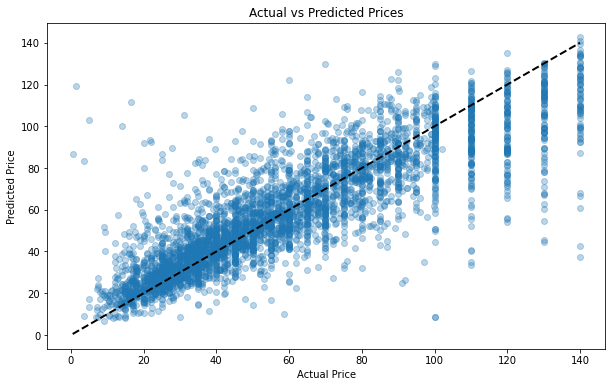

In [102]:
# predict the test set
y_test_pred = best_model.predict(X_test)

# plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

## 6. Insights
- Derive at least EIGHT valuable insights from your data analysis

1. Most of the houses are located in Bangalore city (3392), followed by Lalitpur city (1721) and Pune city (1708).
2. Most of the houses are posted by Dealer (11580), followed by Owner (8484) and Builder (492).
3. Most of the houses have 2 BHK (Bedroom, Hall, Kitchen) (10470), followed by 3 BHK (6523) and 1 BHK (3284).
4. 19168 houses are resale properties and 1388 houses are not resale properties.
5. The average housing price in Hathras city is the highest (140 Lacs), followed by Gurgaon city (92.38 Lacs) and Hassan city (90 Lacs).
6. The average price of houses that are under construction (63.41 Lacs) is higher than houses that are not under construction (58.35 Lacs).
7. There are 356 houses with the highest house prices of 140 Lacs each.
8. The lowest house price is 0.29 Lacs, and it is located in Coimbatore city.
9. The house located in Belgaum city has the largest area, with 2201.02 square ft.
10. Two houses located in Vadodara and Ghaziabad cities have the smallest area, each with 250 square feet

<hr> 

- Justify your insights with reference to the charts or analysis performed

1. According to Chart 1, most of the houses are posted by Dealer, followed by Owner and Builder.
2. According to Chart 2, most of the houses in Lalitpur city are under construction, followed by Bangalore city and Mumbai city.
3. According to Chart 3, Bangalore city has the most houses (24.6%), followed by Lalitpur city (12.5%) and Pune city (12.4%).
4. According to Chart 4, majority of the houses have 2 BHK (Bedroom, Hall & Kitchen), followed by those with 3 BHK and 1 BHK.
5. According to Chart 5, majority of the houses are ready to move.

6. According to Chart 6, SQUARE_FT and BHK_NO show a strong positive correlation with a pearson correlation coefficient of 0.81. TARGET(PRICE_IN_LACS) and SQUARE_FT also show positive correlation with pearson correlation coefficient of 0.44. RESALE and RERA show the negative correlation with pearson correlation coefficient of -0.28. RESALE and UNDER_CONSTRUCTION also show the negative correlation with pearson correlation coefficient of -0.38.
7. According  to Chart 7, housing prices increase as BHK NO. (Bedroom, Hall, Kitchen) increases.
8. According to Chart 8, houses that are not ready to move tend to have higher prices.
9. According to Chart 9, Hathras city tends to have higher average housing prices compared to other cities.
10. According to Chart 10, majority of the houses are located in the geographic area with latitudes between 70 to 82 and longitudes between 5 to 35.


## 7. Create GUI using IPyWidgets
- Instead of using PyQt and TKinter, IPyWidgets is being used to create simple interface because it is specifically designed for building interactive UI elements directly in Jupyter Notebook.

In [103]:
import ipywidgets as widgets
from IPython.display import display

# inputs
construction_radio = widgets.RadioButtons(options=[1, 0], description='UNDER_CONSTRUCTION:', style={'description_width': '210px'})
rera_radio = widgets.RadioButtons(value=0, options=[1, 0], disabled=False, description='RERA:', style={'description_width': '210px'})
bhk_no_slider = widgets.IntSlider(value=2,min=1,max=4,step=1,description='BHK_NO:')
square_ft_float = widgets.BoundedFloatText(value=1148.71, min=250, max=2200, step=1, description='SQUARE_FT (250-2200):', style={'description_width': '210px'})
ready_to_move_radio = widgets.RadioButtons(value=0, options=[1, 0], description='READY_TO_MOVE:', style={'description_width': '210px'})
resale_radio = widgets.RadioButtons(options=[1, 0], description='RESALE:', style={'description_width': '210px'})
longitude_float = widgets.BoundedFloatText(value=19.1615, min=5, max=35, step=1, description='LONGITUDE (5-35):', style={'description_width': '210px'})
latitude_float = widgets.BoundedFloatText(value=79.516656, min=70, max=82, step=1, description='LATITUDE (70-82):', style={'description_width': '210px'})

# output widget to display the result
output = widgets.Output()

# function to make predictions
def predict_price(_):
    features = np.array([[construction_radio.value, rera_radio.value, 
                          bhk_no_slider.value, square_ft_float.value, 
                          ready_to_move_radio.value, resale_radio.value, 
                          longitude_float.value, latitude_float.value,]])
    
    predicted_price = best_model.predict(features)[0]
    
    with output:
        output.clear_output()
        print(f"Predicted House Price: {predicted_price:.2f} Lacs")

# button to trigger prediction
predict_button = widgets.Button(description="Predict Price")
predict_button.on_click(predict_price)

# display the widgets
display(construction_radio, rera_radio, bhk_no_slider, 
        square_ft_float, ready_to_move_radio, resale_radio,
        longitude_float, latitude_float,
        predict_button, output)

RadioButtons(description='UNDER_CONSTRUCTION:', options=(1, 0), style=DescriptionStyle(description_width='210p…

RadioButtons(description='RERA:', index=1, options=(1, 0), style=DescriptionStyle(description_width='210px'), …

IntSlider(value=2, description='BHK_NO:', max=4, min=1)

BoundedFloatText(value=1148.71, description='SQUARE_FT (250-2200):', max=2200.0, min=250.0, step=1.0, style=De…

RadioButtons(description='READY_TO_MOVE:', index=1, options=(1, 0), style=DescriptionStyle(description_width='…

RadioButtons(description='RESALE:', options=(1, 0), style=DescriptionStyle(description_width='210px'), value=1…

BoundedFloatText(value=19.1615, description='LONGITUDE (5-35):', max=35.0, min=5.0, step=1.0, style=Descriptio…

BoundedFloatText(value=79.516656, description='LATITUDE (70-82):', max=82.0, min=70.0, step=1.0, style=Descrip…

Button(description='Predict Price', style=ButtonStyle())

Output()